# <center> CFRM521 Machine Learning in Finance
## <center> Lecture 8
### <center> Yoshihiro Shirai

# Decision trees

- These lecture notes are partially based on "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition, by Aurelien Geron (O'Reilly), 2022."

- Chapter 6: Decision trees, the CART algorithm.

#  0. Overview of the lecture

- We study decision trees which, like SVM, are capable of performing both classification and regression.

- We discuss the idea behind decision trees, an algorithm to train them, and also their properties and shortcomings.

# 1. The idea of decision trees

- The underlying idea of decision trees is simple.

- Assume that you have a supervised learning task (say, classification or regression). Let $\mathbf{x}_n=(x_{n,1},...,x_{n,K})$ be the features of an observation and $y_n$ be the target.

- The goal of a decision tree is to **recursively partition** the feature space $\mathbf{R}^K$ into subspaces such that in each subspace the target values are as **homogeneous** as possible.

- We can then apply simple rules to predict the target in each partition. For example, we can assign the label with maximum number of occurrences (for classification), or assign the average of the response variable to the whole partition (for regression).

- Consider classifying the Iris dataset. The outcome of a decision tree is as follows.

- Note: The colors correspond to the decisions after partitioning along the dashed line. If we were to partition one more time, it would occur along the dotted line.

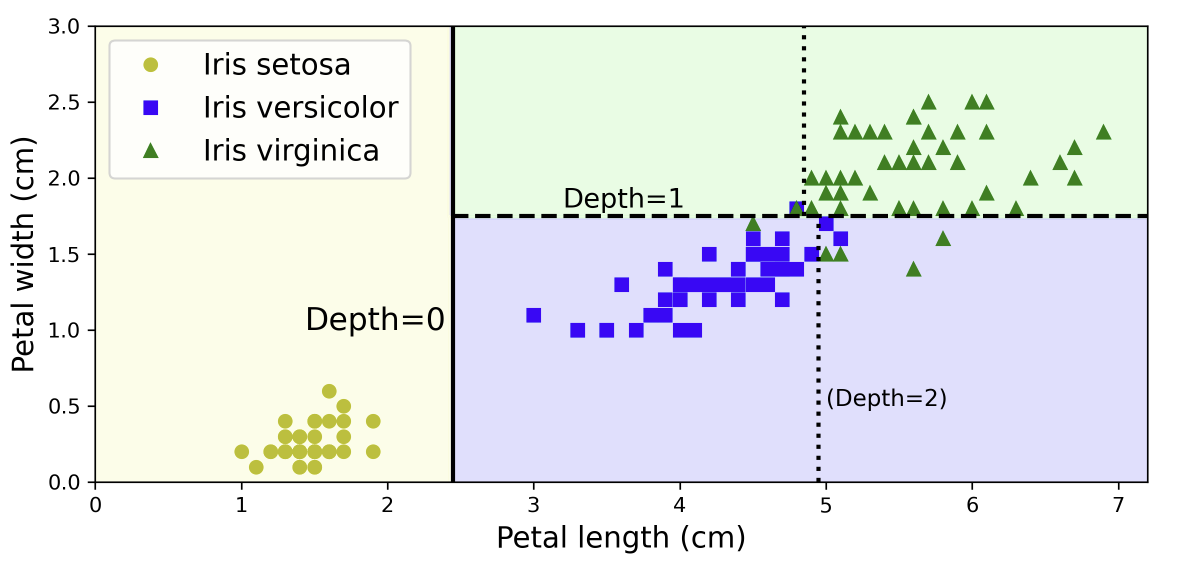

In [1]:
from IPython.display import display, Image
Image("Figs/decision_tree_decision_boundaries_plot.png",width=600)

- The following plot shows the result of a decision tree for a regression task.

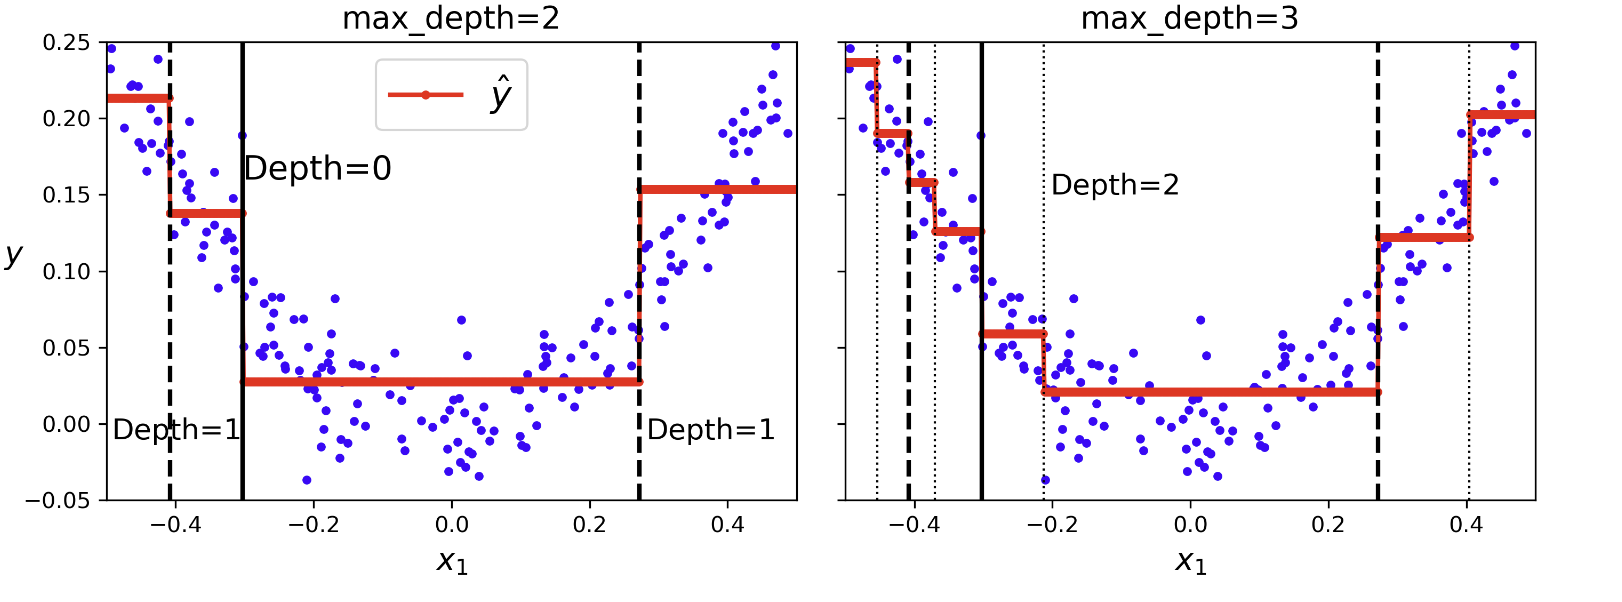

In [2]:
Image("Figs/tree_regression_plot.png",width=800)

- In Scikit-Learn, decision trees are implemented using DecisionTreeClassifier or DecisionTreeRegressor.

- When designing a decision tree, we have to make two choices:

    - How to partition the feature space?

    - How to measure homogeneity or impurity?

# 2. Partitioning using decision trees

- As the name suggests, decision trees use a decision tree to partition the feature space.

- These are a sequence of nested questions.

- The following shows the partitioning and the decision tree for the classification problem above.

- The colors in the partition and the decision tree correspond to a maximum depth of 2. The dotted lines show the additional partitioning if the maximum depth were set to 3.

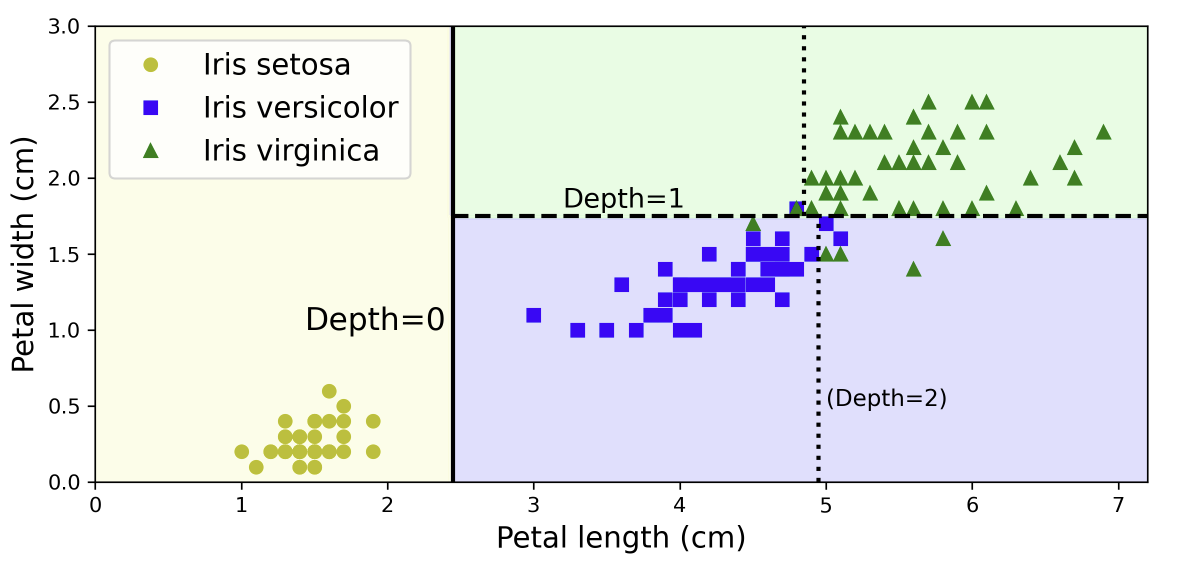

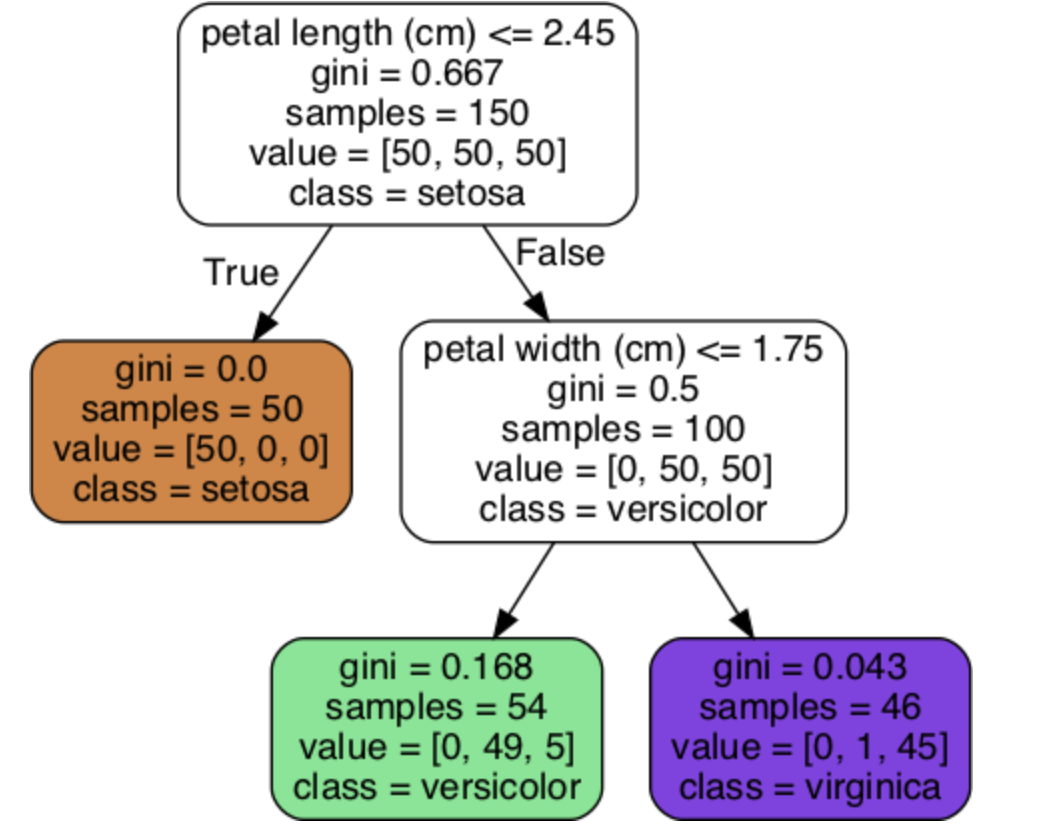

In [4]:
display(Image("Figs/decision_tree_decision_boundaries_plot.png",width=600))
display(Image("Figs/iris_tree.png",width=600))

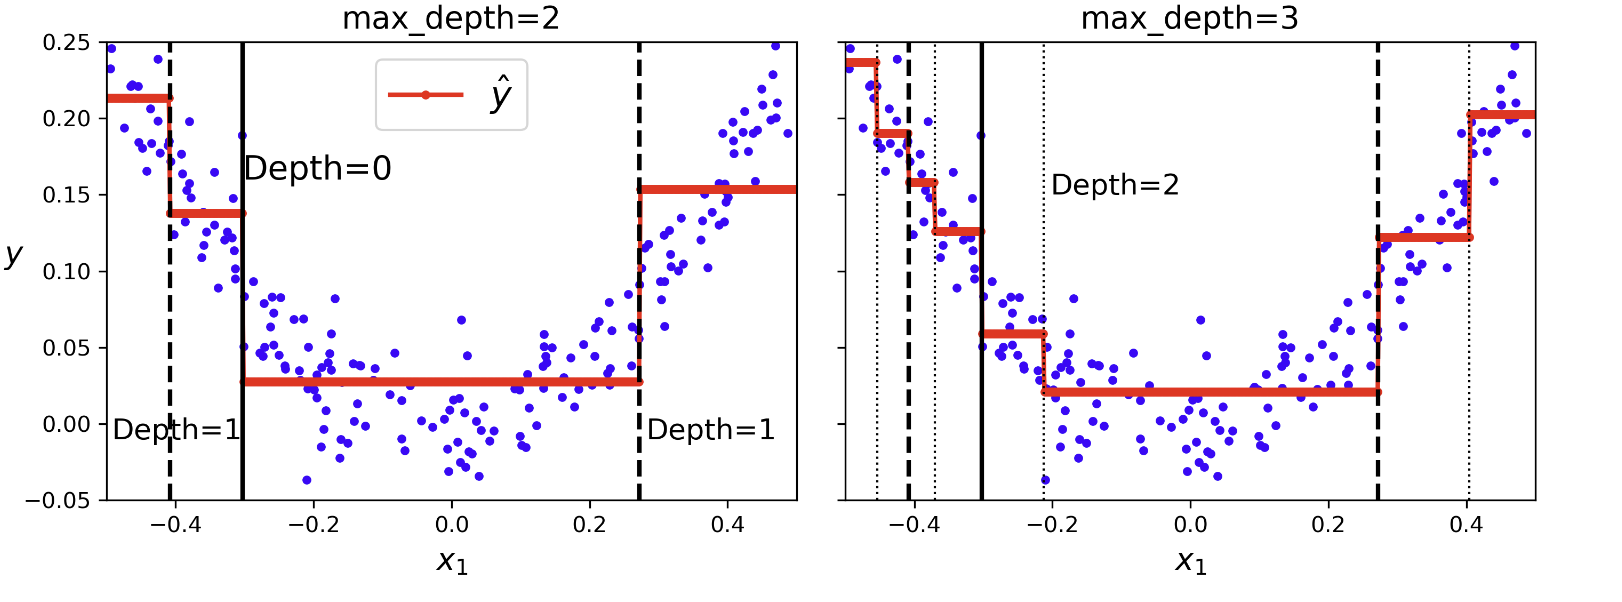

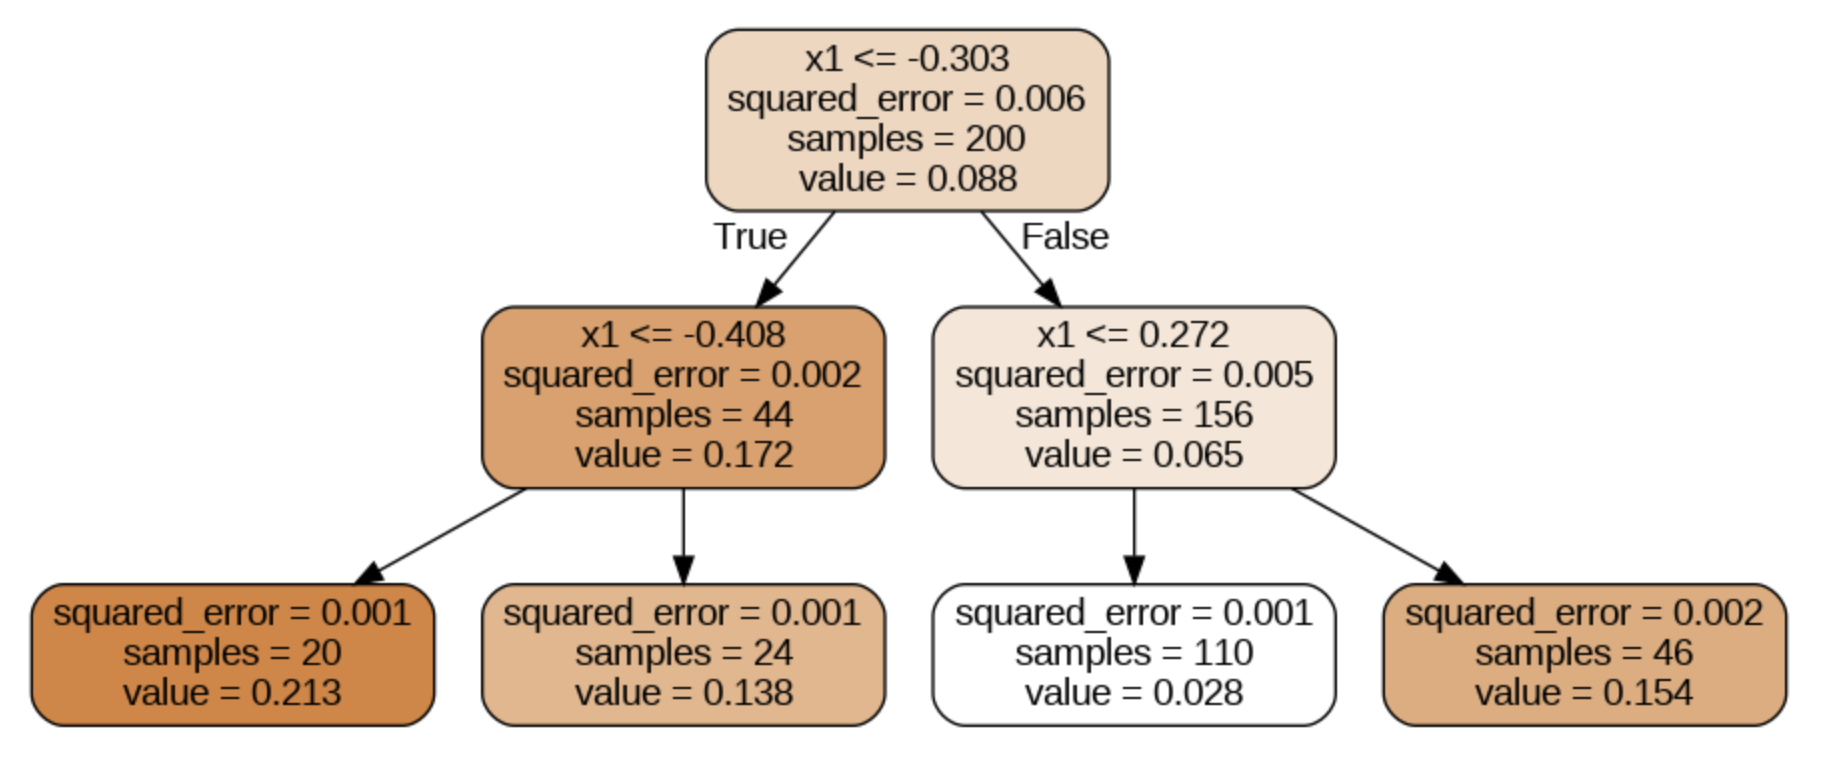

In [6]:
display(Image("Figs/tree_regression_plot.png",width=800))
display(Image("Figs/regression_tree.png",width=800))

- **Decision trees** are a special type of directed graphs. Let us introduce the following terminology.

- The tree consists of a set of **nodes** which are the boxes, and a set of arrows connecting the nodes.

- If an arrow connects node 1 to node 2, we say that node 1 is the **parent** of node 2, while node 2 is the **child** of node 1.

- There is exactly one node without a parent, which is called the **root node**

- There are many nodes without a child. Each one is called a **leaf node**.

- At each non-leaf node, we conduct a **test** on a feature. For example, we ask "is feature $x_k\leq t$?".

- We then "branch" the tree according to the result. We only consider **binary trees** where each non-leaf node has exactly 2 children.

- At leaf nodes, we make a **decision** regarding the target (i.e. the class or the value of the response variable).

- Once we train a decision tree by specifying all the tests and decisions (training a decision tree is usually referred to as ***growing*** the tree), we can make predictions by following the tree with the new values of the features. This is called **traversing** the tree.

# 3. Training decision trees

- How to train or grow the tree?

- Assume that we only consider binary trees, and one feature at each test.

- Our end goal is to minimize the impurity (i.e. variation in the target variables) in each partition.

- Thus, we should choose a measure of impurity.

- Then we use the CART algorithm discussed below to choose trees that try to minimize this impurity.

- For a regression task, this is not hard. We can, for instance, use MSE.

- Suppose that $\{(\mathbf{x}_n,y_n)\}_{n\in I_k}$ are all the observations that are in node $k$ (node $k$ is denoted by the set $I_k$). We then calculate
$$\begin{align*}
    \overline{y}_k &= \frac{1}{N_k}\sum_{n\in I_k} y_n,\\
    \text{MSE}_k &= \frac{1}{N_k}\sum_{n\in I_k}(y_n-\overline{y})^2.
\end{align*}$$

- We use $\text{MSE}_k$ as a measure of impurity of the node. If $\text{MSE}_k=0$, the node is pure. The larger values of MSE represent more impurity (i.e. variation in the response variable).

- For classification tasks, a common measure of impurity is the \textbf{Gini impurity}

- Consider a sample with labels $y_1,\dots, y_N$, where each label can be any of $M$ possible class $\{1,\dots, M\}

- Let $p_{m}$ be the proportion of the sample that has label $m$
$$​\begin{align*}
   p_m = \frac{\#\text{ of observation in class } m}{N}
\end{align*}$$

- The Gini impurity is defined as
$$\begin{align*}
    G = 1 - \sum_{m=1}^M p_m^2.
\end{align*}$$

- It can be shown that $G\geq 0$, and $G=0$ if all observations are from one class.

- The Gini impurity can be interpreted as follows. Assume that you randomly choose an observation from the sample, then assign a random label $\hat{Y}$ such that $\mathbb{P}(\hat{Y}=m)=p_m$.

- Let us calculate the probabilioty that we assign the wrong label:
$$\begin{align*}
   \mathbb{P}(\hat{Y}\ne Y) &= \sum_{m=1}^M \mathbb{P}(Y=m)\mathbb{P}(\hat{Y}\ne Y|Y=m)\\
   &= \sum_{m=1}^M \mathbb{P}(Y=m)\mathbb{P}(\hat{Y}\ne m|Y=m)\\
   &= \sum_{m=1}^M \mathbb{P}(Y=m)\big(1-\mathbb{P}(\hat{Y} = m|Y=m)\big)\\
   &= \sum_{m=1}^M p_m\big(1-p_m)\big)\\
   &= \sum_{m=1}^M p_m - \sum_{m=1}^M p_m^2 = G 
\end{align*}$$

- **Entropy** is another measure for impurity and is defined as
$$\begin{align*}
    H = - \sum_{m=1}^M p_m \log_2 p_m.
\end{align*}$$

- Here, we take the convention $0\times\log_2 0 = 0$.

- It can be shown $H\ge 0$ and $H=0$ if the sample is "pure" (i.e. all the observations are of the same class)

- Entropy can be interpreted as the minimum average number of bits needed to store the label of a randomly chosen observation from the sample.

# 3.1. CART algorithm

- Scikit-learn uses the <em>Classification And Regression Tree (CART)</em> algorithm for "growing" decision trees.

- The algorithm is quite simple. Let the features be $\mathbf{x}={x_1,\dots,x_K}$ 

- At the root node 0, it chooses a feature index $k_0\in\{1,\dots,K\}$ and a threshold level $t_0$ that minimizes the following cost function
$$\begin{align*}
    J(k,t) = \frac{N_\text{left}}{N} \bigtriangleup_\text{left} + \frac{N_\text{right}}{N} \bigtriangleup_\text{right}
\end{align*}$$

- Here, "left" (respectively, "right") is the set of observations for which $x_k\le t$ (respectively $> t$)

- $\bigtriangleup$ is any impurity measure. For classification, we can use Gini impurity or entropy. For regression, we can choose MSE.

- Thus, we are minimizing the average impurity of the partitions, weighted by the proportion of samples in each partition.

- The algorithm then continues recursively.

- At node $i$, let $N_i$ be the number of observations in the corresponding partition. We first find a split $(k_i, t_i)$ that minimizes
$$\begin{align*}
    J(k,t) = \frac{N_{\text{left}}}{N_i} \bigtriangleup_\text{left} + \frac{N_\text{right}}{N_i} \bigtriangleup_\text{right}
\end{align*}$$

- If this minim cost function is lower than the impurity of the partition, we split the partition.

- If the impurity cannot be reduced, or if we reach the maximum number of levels (max_depth hyperparameter), we consider the node as a leaf node.

- A few other hyperparameters in Scikit-Learn's implementation of decision trees control additional stopping conditions (discussed below).

- At each leaf node, we assign a uniform response:

    - For regression, we assign the average of the response variables in the node.
    - For classification, we assign the most frequent label in the node.
    - For classification, we can also determine the prediction probabilities as the relative frequencies of the class in the node.

# 3.2. Fitting and regularizing decision trees

- Decision trees are a type of **non-parametric** model, in the sense that the number of their parameters (that is, decision thresholds and which feature to use at each branch) is not predetermined. Given enough depth, they can perfectly fit the training set.

- As a result, we have to restrict decision trees to avoid overfitting the training set.

- Decision trees are among the few ML methods that are insensitive to scaling of the features. You do not need to scale features if you are using (only) decision trees. In other words, you would not get any performance boost by scaling features when using decision trees.

- Decision tree growing algorithms usually provide several methods to regularize the tree. We can provide the depth of the tree. We can also provide the minimum number of observations for a node to be divisible, or the minimum number of observations in a leaf node. We are also able to provide the maximum number of leaf nodes.

- In Scikit-Learn, these hyperparameters are:

    - `min_samples_split` (the minimum number of samples a node must have before it can be split)
    - `min_samples_leaf` (the minimum number of samples a leaf node must have)
    - `max_leaf_nodes` (the maximum number of leaf nodes)
    - `max_features` (the maximum number of features that are evaluated for splitting at each node)
    - `max_depth` (the maximum depth of the tree)

- Increasing `min_*` hyperparameters or reducing `max_*` hyperparameters will regularize the model.

- Another form of regularization is called **minimal cost-complexity pruning*. After growing a tree, this pruning algorithm chooses the subtree $T$ that minimizes $$R(T)+\alpha L_T$$ where $L_T$ is the number of leaf nodes and $R(T)$ is the total sample weighted impurity of the leaf nodes, and $\alpha\geq 0$ is the regularization parameter.

- In Scikit-Learn, this is done by setting $\alpha$ using the hyperparameter `ccp_alpha`.

- Now let us consdier fitting a decision tree to the Iris dataset.

In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

treeclf = DecisionTreeClassifier(random_state=42)
treeclf.fit(X, y)

DecisionTreeClassifier(random_state=42)

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [9]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
subplots=[221,222,223,224]

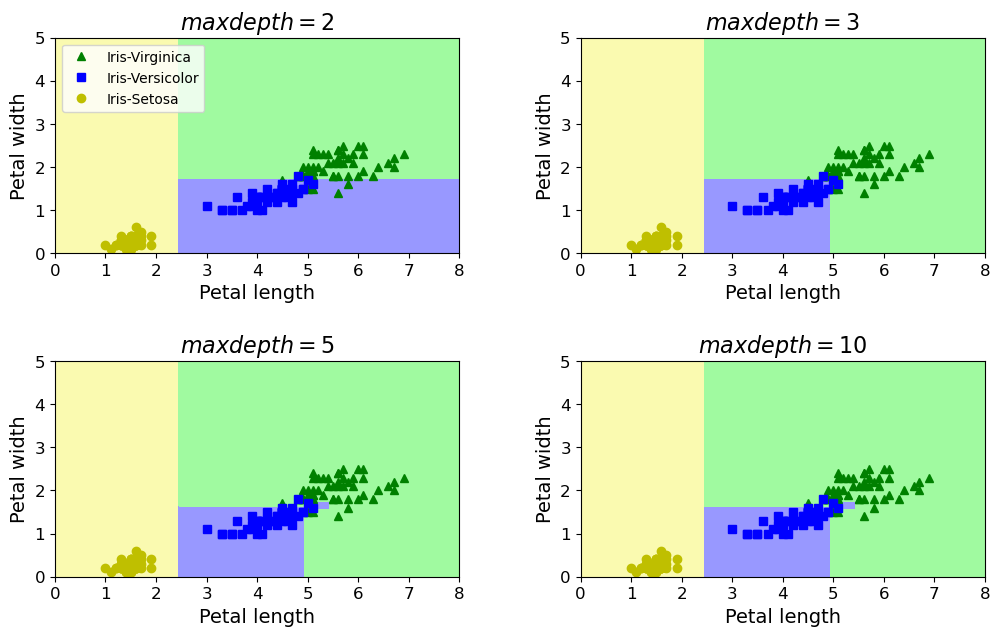

In [10]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
justonce = True
for idx, param in enumerate([2, 3, 5, 10]):
    max_depth = param
    treeclf.set_params(max_depth=max_depth).fit(X, y)
    y_predict = treeclf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.subplot(subplots[idx])
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    if justonce:
        plt.legend(loc="upper left", fontsize=10)
        justonce=False
    plt.title("$max depth = {}$".format(max_depth), fontsize=16)
    plt.axis([0, 8, 0, 5])
plt.show()

- Next, consider fitting a decision tree to the make_moons dataset.

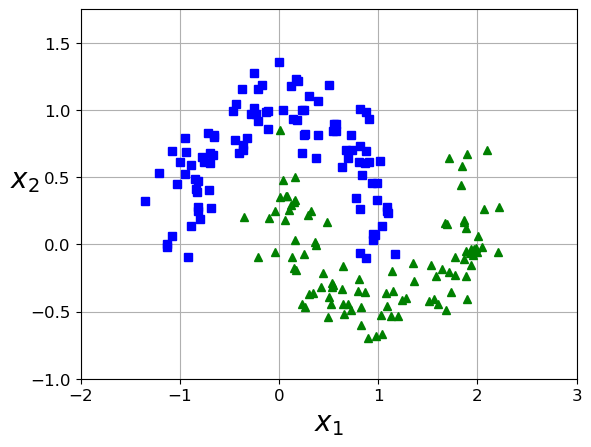

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.15, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.grid(True, which='both')
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.axis([-2, 3, -1, 1.75])
plt.show()

In [12]:
custom_cmap = ListedColormap(['#9898ff','#a0faa0'])
x0, x1 = np.meshgrid(np.linspace(-2, 3, 200).reshape(-1, 1),
                     np.linspace(-1, 1.75, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

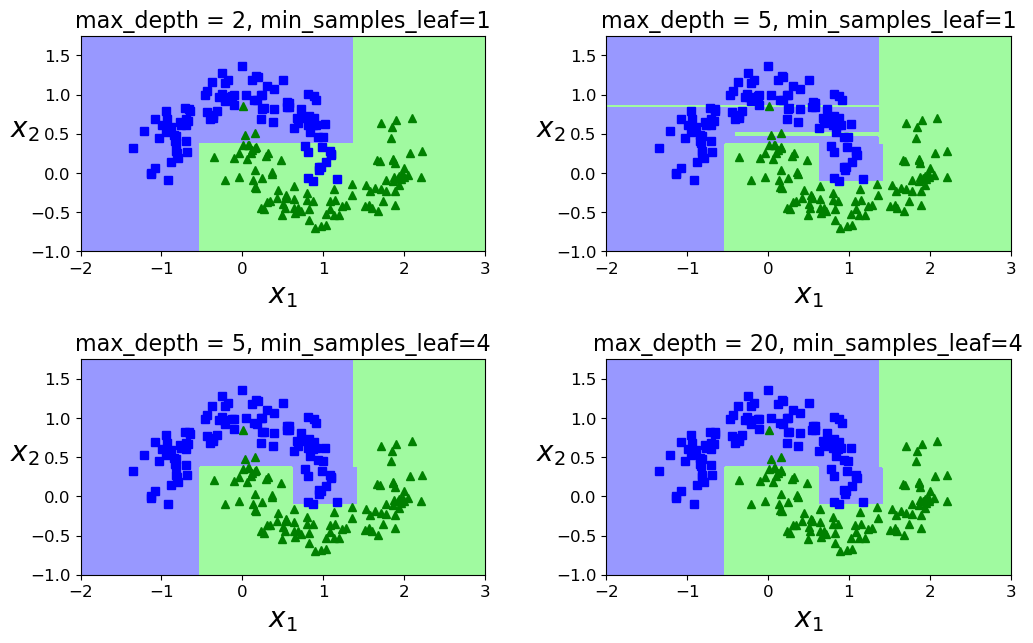

In [13]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
justonce = True
for idx, param in enumerate([(2,1), (5, 1), (5, 4), (20, 4)]):
    max_depth, min_samples_leaf = param
    treeclf.set_params(max_depth=max_depth,
                       min_samples_leaf = min_samples_leaf).fit(X, y)
    y_predict = treeclf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.subplot(subplots[idx])
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    plt.title("max_depth = {}, min_samples_leaf={}"
              .format(max_depth, min_samples_leaf), fontsize=16)
    plt.axis([-2, 3, -1, 1.75])
plt.show()

- The model with `max_depth=5` and `min_samples_leaf=1` is overfitting, forming a leaf node (a split) with one sample from the green set. This model will not generalize well out-of-sample.

- Setting `min_samples_leaf=4`` regularizes the model, fixing this overfit.

- Regression trees are also prone to overfitting.

- In the following example, without any regularization (i.e. using the default hyperparameters), we get a massively overfitted model, which is fixed by setting min_samples_leaf=10.

In [14]:
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

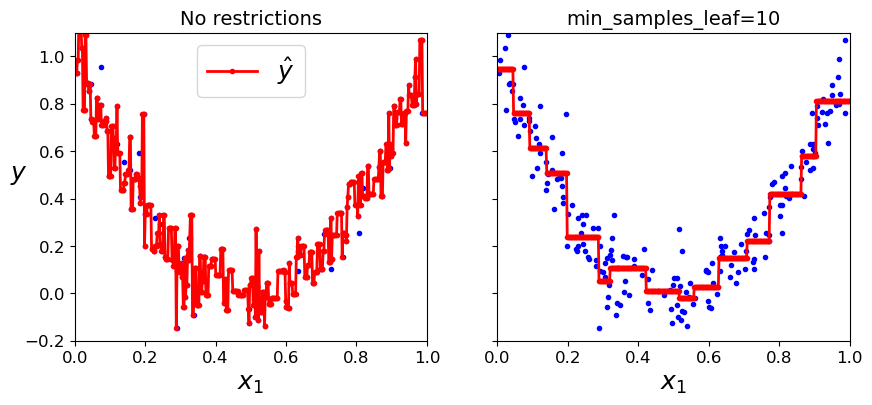

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)
plt.show()

# 3.3. Instability of decision trees

- Decision trees have high variability due to the randomness in the training algorithm and sensitivity to hyperparameters.

- In the following example, we fit a decision tree to the Iris dataset again, and consider the effect of changing the random seed from 42 to 40, resulting in a completely different decision tree.

In [16]:
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [17]:
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
treeclf = DecisionTreeClassifier()
subplots=[221,222]

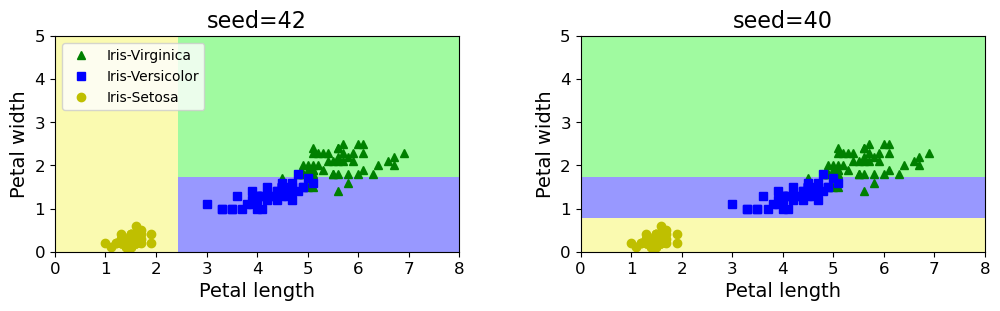

In [18]:
plt.figure(figsize=(12, 7))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
justonce = True
for idx, param in enumerate([42,40]):
    seed = param
    treeclf.set_params(max_depth=2, random_state=seed).fit(X, y)
    y_predict = treeclf.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    plt.subplot(subplots[idx])
    plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
    plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
    plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    if justonce:
        plt.legend(loc="upper left", fontsize=10)
        justonce=False
    plt.title("seed={}".format(seed), fontsize=16)
    plt.axis([0, 8, 0, 5])
plt.show()

- The random seed is changing the decision tree because there are 2 ways for the first split to minimize the cost (splitting along petal length or petal width to keep all setosas in one leaf node). When there is a non-unique minimum like this, a split is chosen at random.

- Also, if the features are rotated then the splits will be completely different. In the example below, the features are rotated by 45 degress.

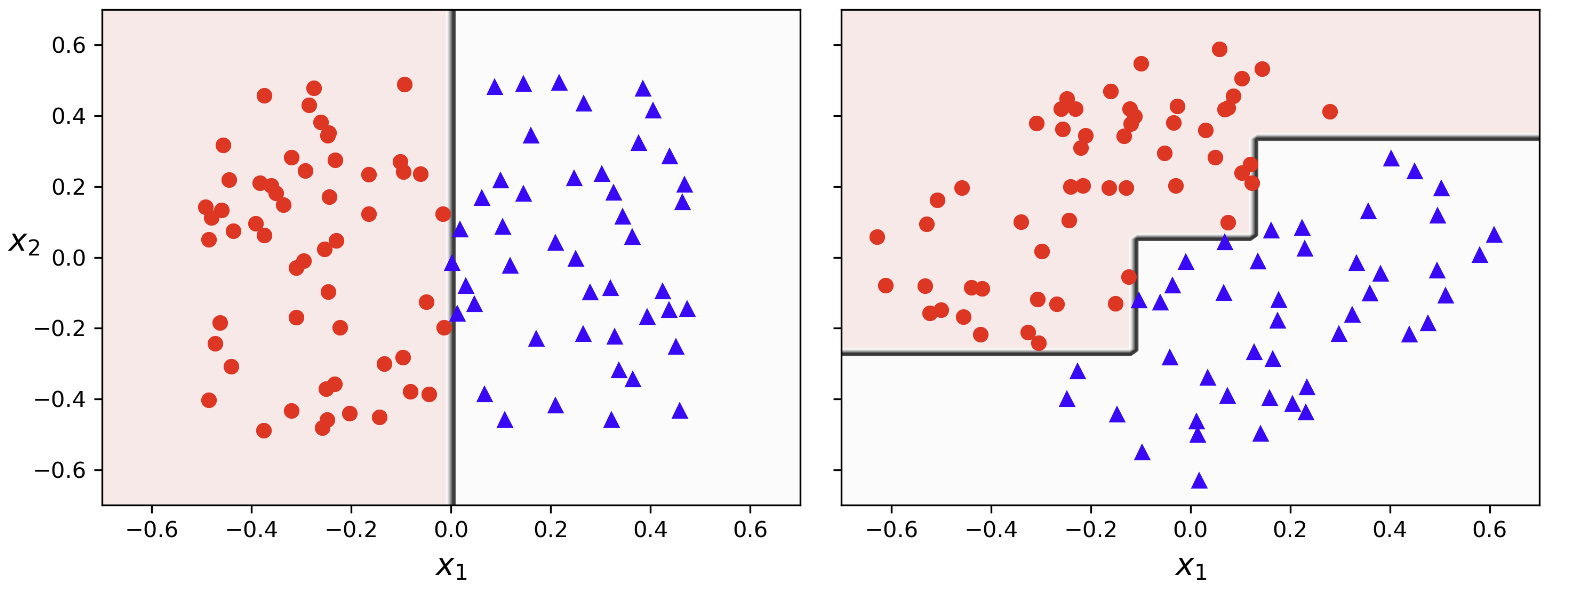

In [19]:
Image("Figs/sensitivity_to_rotation_plot.png",width=800)

- One way to limit this problem is to scale the data, then apply a principal component analysis transformation (discussed in a later lecture).

- This rotates the data onto the axes that explain the most varability, usually making it easier to fit the model.

- In the Iris example, a decision tree fits well by simply partitioning along the first axis.

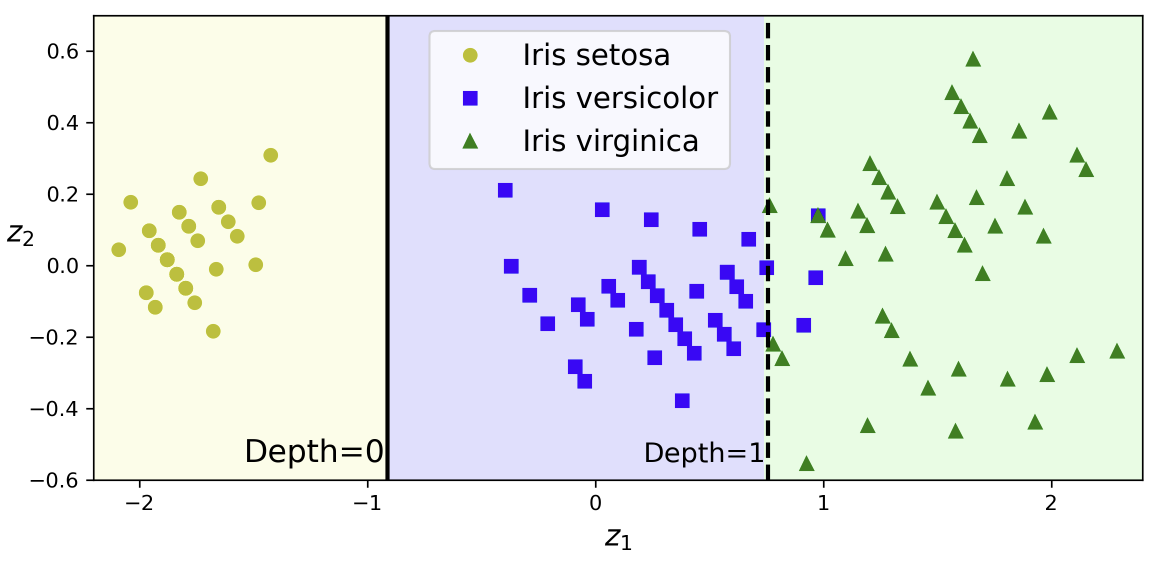

In [20]:
Image("Figs/pca_preprocessing_plot.png",width=600)